In [9]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  



In [10]:

# http://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame


n = 2458286 # total populatoin (or number of rows in file) 
s = 3000 #desired sample size
filename = "/home/ssamot/hUSCensus1990raw.data.zip"
skip = sorted(np.random.choice(n, n-s, replace=False) + 1)
print len(skip)
df = pandas.read_csv(filename,compression = "zip", header=0, sep='\t', skiprows=skip)

2455286


In [11]:
income_sum = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = income_sum

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ] )


(3000, 22)
Number of clusters: 2
Silhouette Coefficient: 0.400


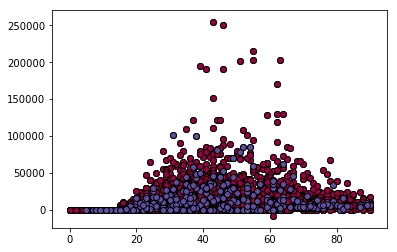

In [12]:
X = df_demo.values



from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)
print X_db.shape
n_clusters = 2

clusterer = KMeans(n_clusters = n_clusters).fit(X_db)
labels = clusterer.predict(X_db)



print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

plt.savefig('kmeans-23-%d.png'%(n_clusters), bbox_inches='tight')

In [13]:
np.set_printoptions(suppress=True)
sc.inverse_transform(clusterer.cluster_centers_)


array([[    35.41540212,  14441.94347496,      8.57890744,      0.53072838,
             1.        ,     -0.        ,     -0.        ,      0.        ,
             0.        ,      0.58421851,      0.12632777,      0.06714719,
             0.10053111,      0.06221548,      0.02959029,      0.01479514,
             0.00455235,      0.00341426,      0.0030349 ,      0.00189681,
             0.00151745,      0.00075873],
       [    38.4010989 ,  11849.28846154,      8.13186813,      0.37912088,
            -0.        ,      0.57967033,      0.21703297,      0.13461538,
             0.06868132,      0.55494505,      0.14285714,      0.06043956,
             0.07692308,      0.06043956,      0.03571429,      0.03571429,
             0.01923077,      0.00549451,      0.00274725,      0.00274725,
             0.00274725,      0.        ]])

In [14]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_db = StandardScaler().fit_transform(X)
db = DBSCAN().fit(X_db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))
print X_db.shape

Estimated number of clusters: 25
Silhouette Coefficient: 0.034
(3000, 22)


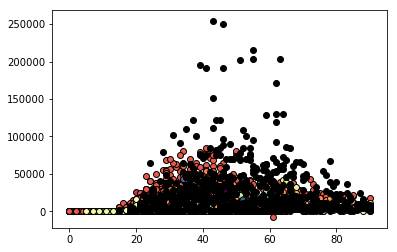

In [15]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        #continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('dbscan-23.png', bbox_inches='tight')

In [16]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
#model = KernelPCA(n_components = 2, kernel='rbf')
model = PCA(n_components = 2)

#model = TSNE(verbose = 100, learning_rate = 1000, method = "exact")
#model = MDS()
#print X_db.shape
X_r = model.fit_transform(MinMaxScaler().fit_transform(X)) 
print X_r.shape
#print model.components_

(3000, 2)


In [17]:

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

db = DBSCAN(eps=1.0, min_samples=50).fit(X_r)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))



import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        #continue

    class_member_mask = (labels == k)

    xy = X_r[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X_r[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('dbscan-tsne.png', bbox_inches='tight')

Estimated number of clusters: 1


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Number of clusters: 120
Silhouette Coefficient: 0.497


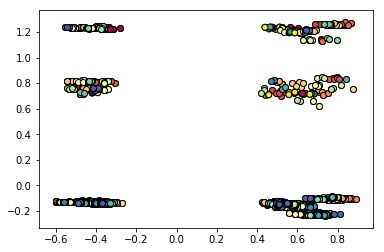

In [18]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.cluster import AffinityPropagation as afp
X_db = X_r
#X_db = X
n_clusters = 120

clusterer = KMeans(n_clusters = n_clusters).fit(X_db)
labels = clusterer.predict(X_db)



print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_r[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X_r[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

plt.savefig('kmeans-tsne-2%d.png'%(n_clusters), bbox_inches='tight')

2700
300


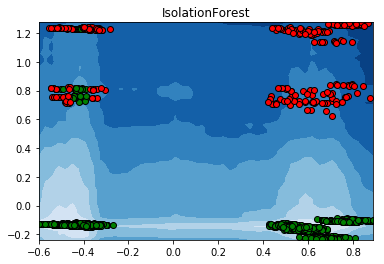

In [19]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.1)
clf.fit(X_r)
y_pred_train = clf.predict(X_r)

pos = y_pred_train > 0
neg = y_pred_train < 0

#print min((X[:, 0])), max((X[:, 0]))

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((X_r[:, 0])), max((X_r[:, 0])), 50), np.linspace(min((X_r[:, 1])), max((X_r[:, 1])), 50))
#print xx, yy
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#print Z

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_r[pos][:, 0], X_r[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(X_r[neg][:, 0], X_r[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

print pos.sum()
print neg.sum()

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


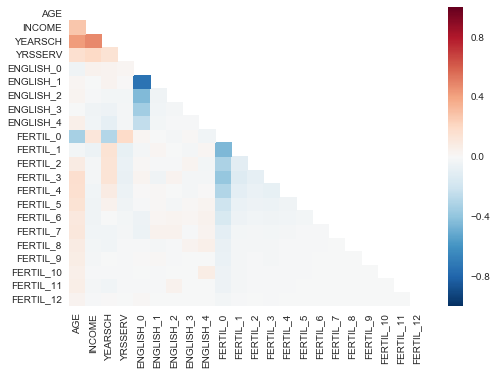

In [20]:

    
# plot_corr(df_demo)
import seaborn as sns
sns.set(style="white")
mask = np.zeros_like(df_demo.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_demo.corr(), mask = mask)

plt.savefig("corr.pdf", bbox_inches='tight')

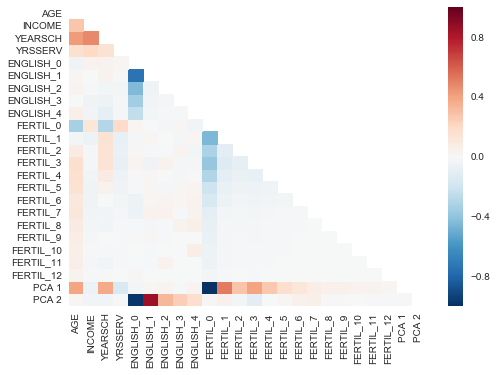

In [21]:
df_pca = df_demo.copy()
df_pca["PCA 1"] = X_r[:,0]
df_pca["PCA 2"] = X_r[:,1]
sns.set(style="white")
mask = np.zeros_like(df_pca.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_pca.corr(), mask = mask)
plt.savefig("corr-pca.pdf", bbox_inches='tight')